<a href="https://colab.research.google.com/github/Sushmitha-Katti/ERA/blob/main/Session%207%20-%20In-Depth%20Coding%20Practice/Drill1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

## Code Drill 1
  * Target
    * Setup Basic Skeleton. 
    * Modularized the Code. 
      - models folder to store all models.
      - train_test - include train test functions.
      - utils - includes all utility functions.
  * Result
    * Parameters: 6,379,786
    * Epochs: 20
    * Best Training Accuracy: 100
    * Best Test Accuracy: 99.38
  * Analysis
     * Extremely heavy model
     * Training Accuracy reached 100%, no more space to learn for the model

In [34]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.

Here is the list of all the transformations which come pre-built with PyTorch

1.   Compose
2.   ToTensor
3.   ToPILImage
4. Normalize
5. Resize
6. Scale
7. CenterCrop
8. Pad
9. Lambda
10. RandomApply
11. RandomChoice
12. RandomOrder
13. RandomCrop
14. RandomHorizontalFlip
15. RandomVerticalFlip
16. RandomResizedCrop
17. RandomSizedCrop
18. FiveCrop
19. TenCrop
20. LinearTransformation
21. ColorJitter
22. RandomRotation
23. RandomAffine
24. Grayscale
25. RandomGrayscale
26. RandomPerspective
27. RandomErasing

You can read more about them [here](https://pytorch.org/docs/stable/_modules/torchvision/transforms/transforms.html)

In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([

                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 237568705.15it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 20219611.72it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 67295501.53it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20202045.35it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Dataloader Arguments & Test/Train Dataloaders


In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


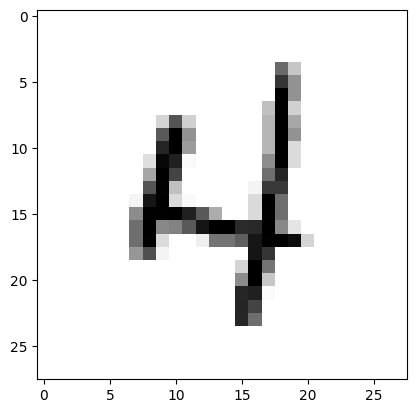

In [5]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


## MORE

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

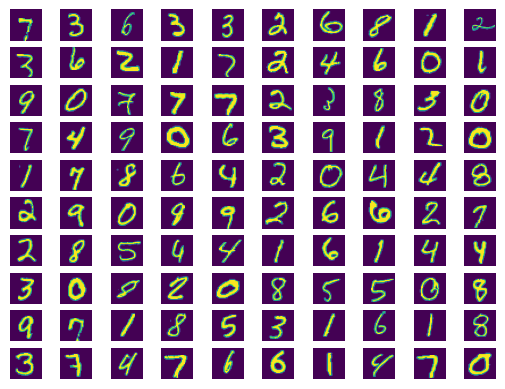

In [8]:
from utils import plot_images
images, labels = next(dataiter)
plot_images(100, images)

# How did we get those mean and std values which we used above?

Let's run a small experiment

In [ ]:
# simple transform
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [10]:
from models.model1 import Model1
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model1().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (

# Training and Testing

All right, so we have 6.3M params, and that's too many, we know that. But the purpose of this notebook is to set things right for our future experiments.

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs.

Let's write train and test functions

# Let's Train and test our model

In [33]:
%load_ext autoreload
%autoreload 2
from train_test import TrainTest
train_test_instance = TrainTest()

model =  Model1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train_test_instance.train(model, device, train_loader, optimizer, epoch)
    train_test_instance.test(model, device, test_loader)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
EPOCH: 0


Loss=0.05618483945727348 Batch_id=468 Accuracy=87.40: 100%|██████████| 469/469 [00:22<00:00, 20.77it/s]



Test set: Average loss: 0.0838, Accuracy: 9726/10000 (97.26%)

EPOCH: 1


Loss=0.0815214216709137 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:20<00:00, 22.51it/s]



Test set: Average loss: 0.0397, Accuracy: 9872/10000 (98.72%)

EPOCH: 2


Loss=0.019076718017458916 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:20<00:00, 23.05it/s]



Test set: Average loss: 0.0288, Accuracy: 9907/10000 (99.07%)

EPOCH: 3


Loss=0.016878260299563408 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:20<00:00, 22.38it/s]



Test set: Average loss: 0.0279, Accuracy: 9909/10000 (99.09%)

EPOCH: 4


Loss=0.011790021322667599 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:21<00:00, 21.48it/s]



Test set: Average loss: 0.0353, Accuracy: 9892/10000 (98.92%)

EPOCH: 5


Loss=0.04682126268744469 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:21<00:00, 21.95it/s]



Test set: Average loss: 0.0291, Accuracy: 9904/10000 (99.04%)

EPOCH: 6


Loss=0.014387370087206364 Batch_id=468 Accuracy=99.65: 100%|██████████| 469/469 [00:20<00:00, 22.55it/s]



Test set: Average loss: 0.0294, Accuracy: 9914/10000 (99.14%)

EPOCH: 7


Loss=0.01141544058918953 Batch_id=468 Accuracy=99.74: 100%|██████████| 469/469 [00:20<00:00, 22.89it/s]



Test set: Average loss: 0.0291, Accuracy: 9906/10000 (99.06%)

EPOCH: 8


Loss=0.0003883395984303206 Batch_id=468 Accuracy=99.80: 100%|██████████| 469/469 [00:20<00:00, 22.39it/s]



Test set: Average loss: 0.0312, Accuracy: 9914/10000 (99.14%)

EPOCH: 9


Loss=0.0021115669514983892 Batch_id=468 Accuracy=99.82: 100%|██████████| 469/469 [00:21<00:00, 21.74it/s]



Test set: Average loss: 0.0276, Accuracy: 9926/10000 (99.26%)

EPOCH: 10


Loss=0.0007262981380335987 Batch_id=468 Accuracy=99.83: 100%|██████████| 469/469 [00:21<00:00, 21.82it/s]



Test set: Average loss: 0.0332, Accuracy: 9919/10000 (99.19%)

EPOCH: 11


Loss=0.0027722492814064026 Batch_id=468 Accuracy=99.88: 100%|██████████| 469/469 [00:21<00:00, 22.29it/s]



Test set: Average loss: 0.0290, Accuracy: 9925/10000 (99.25%)

EPOCH: 12


Loss=0.0061055622063577175 Batch_id=468 Accuracy=99.90: 100%|██████████| 469/469 [00:21<00:00, 21.75it/s]



Test set: Average loss: 0.0299, Accuracy: 9924/10000 (99.24%)

EPOCH: 13


Loss=0.00010246093006571755 Batch_id=468 Accuracy=99.95: 100%|██████████| 469/469 [00:20<00:00, 22.51it/s]



Test set: Average loss: 0.0296, Accuracy: 9926/10000 (99.26%)

EPOCH: 14


Loss=0.00040703811100684106 Batch_id=468 Accuracy=99.94: 100%|██████████| 469/469 [00:23<00:00, 19.56it/s]



Test set: Average loss: 0.0272, Accuracy: 9935/10000 (99.35%)

EPOCH: 15


Loss=2.9105771318427287e-05 Batch_id=468 Accuracy=99.97: 100%|██████████| 469/469 [00:21<00:00, 21.67it/s]



Test set: Average loss: 0.0297, Accuracy: 9930/10000 (99.30%)

EPOCH: 16


Loss=7.696184184169397e-05 Batch_id=468 Accuracy=99.99: 100%|██████████| 469/469 [00:22<00:00, 21.25it/s]



Test set: Average loss: 0.0293, Accuracy: 9938/10000 (99.38%)

EPOCH: 17


Loss=1.8389761180515052e-06 Batch_id=468 Accuracy=100.00: 100%|██████████| 469/469 [00:21<00:00, 22.00it/s]



Test set: Average loss: 0.0310, Accuracy: 9938/10000 (99.38%)

EPOCH: 18


Loss=3.722659312188625e-05 Batch_id=468 Accuracy=100.00: 100%|██████████| 469/469 [00:20<00:00, 22.73it/s]



Test set: Average loss: 0.0316, Accuracy: 9935/10000 (99.35%)

EPOCH: 19


Loss=3.8450398278655484e-05 Batch_id=468 Accuracy=100.00: 100%|██████████| 469/469 [00:20<00:00, 22.91it/s]



Test set: Average loss: 0.0319, Accuracy: 9929/10000 (99.29%)



Text(0.5, 1.0, 'Test Accuracy')

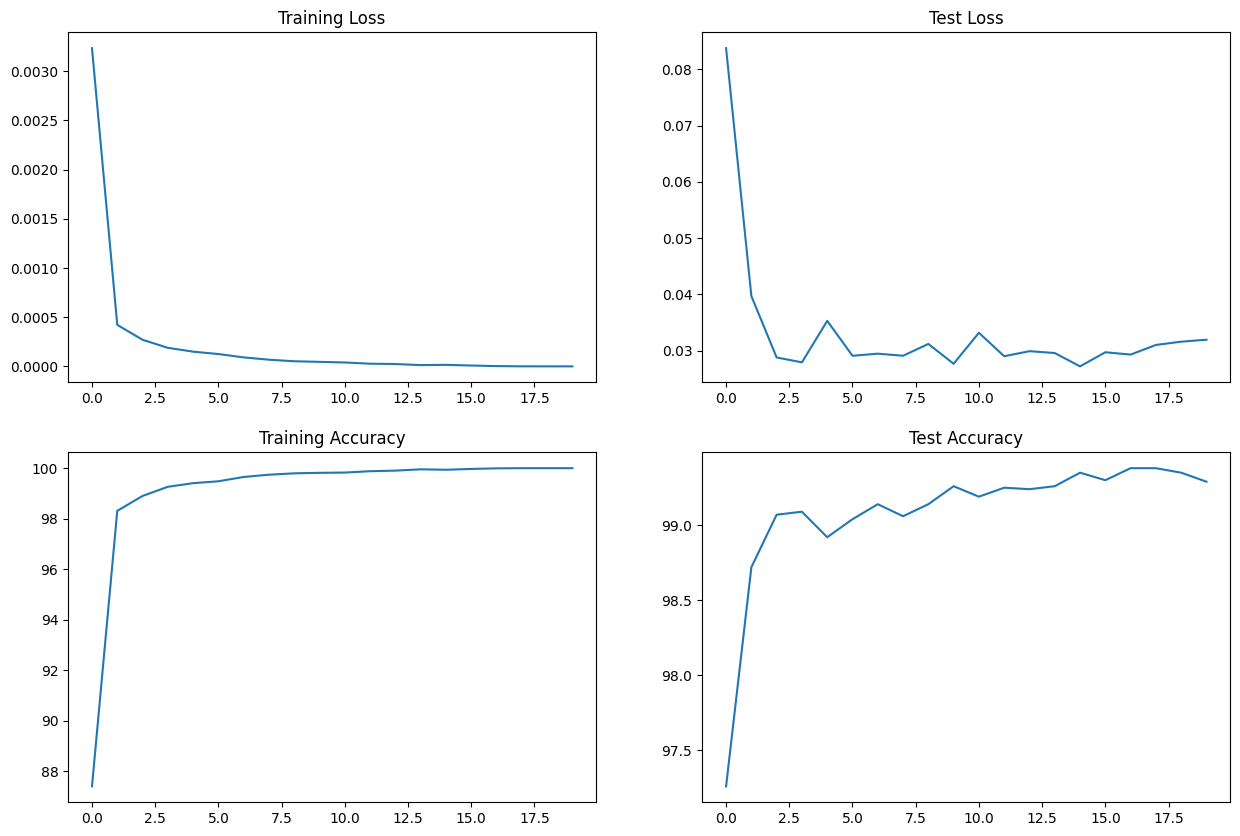

In [35]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_test_instance.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_test_instance.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(train_test_instance.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(train_test_instance.test_acc)
axs[1, 1].set_title("Test Accuracy")